In [57]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [25]:
from google.colab import userdata
import os
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [26]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
! unzip "mobile-price-classification.zip"

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
mobile-price-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mobile-price-classification.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: train.csv               


# 1. Data Loading And Exploration:

In [27]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 2. Data Cleaning And Preprocessing:

In [29]:
# checcking for missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [30]:
# Checking for duplicats
data.duplicated().sum()

0

In [31]:
# checking for outliers
for col in data.columns:
  print(f'{col}: {data[col].unique()}')

battery_power: [ 842 1021  563 ... 1139 1467  858]
blue: [0 1]
clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim: [0 1]
fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g: [0 1]
int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 1

# 3. Statistical Analysis With NumPy And SciPy:

For more clear analysis I want to divide data by price range column

In [32]:
grouped_data = data.groupby('price_range')

In [33]:
mean_val=grouped_data.mean()
print("Mean values by categories:\n", mean_val)

Mean values by categories:
              battery_power   blue  clock_speed  dual_sim     fc  four_g  \
price_range                                                               
0                 1116.902  0.486       1.5502     0.500  4.084   0.518   
1                 1228.868  0.490       1.4886     0.510  4.340   0.524   
2                 1228.320  0.486       1.5298     0.498  4.498   0.494   
3                 1379.984  0.518       1.5204     0.530  4.316   0.550   

             int_memory   m_dep  mobile_wt  n_cores      pc  px_height  \
price_range                                                              
0                31.174  0.4902    140.552    4.600   9.574    536.408   
1                32.116  0.5240    140.510    4.298   9.924    666.892   
2                30.920  0.4908    143.614    4.682  10.018    632.284   
3                33.976  0.5020    136.320    4.502  10.150    744.848   

             px_width       ram    sc_h   sc_w  talk_time  three_g  \
price_

In [34]:
median_val=grouped_data.median()
print("Median values by categories:\n",median_val)

Median values by categories:
              battery_power  blue  clock_speed  dual_sim   fc  four_g  \
price_range                                                            
0                   1066.0   0.0         1.55       0.5  3.0     1.0   
1                   1206.0   0.0         1.50       1.0  3.0     1.0   
2                   1219.5   0.0         1.50       0.0  3.0     0.0   
3                   1449.5   1.0         1.50       1.0  3.0     1.0   

             int_memory  m_dep  mobile_wt  n_cores    pc  px_height  px_width  \
price_range                                                                     
0                  30.0    0.5      142.0      5.0   9.5      465.5    1132.5   
1                  32.0    0.5      141.0      4.0  10.0      606.0    1223.0   
2                  30.0    0.5      145.0      5.0  10.0      538.5    1221.5   
3                  34.5    0.5      134.0      5.0  10.0      674.0    1415.5   

                ram  sc_h  sc_w  talk_time  three_

In [35]:
std_val=grouped_data.std()
print("Standart deviation by categories:\n",std_val)

Standart deviation by categories:
              battery_power      blue  clock_speed  dual_sim        fc  \
price_range                                                             
0               410.801305  0.500305     0.848941  0.500501  4.183772   
1               438.614528  0.500401     0.814479  0.500401  4.499432   
2               452.863065  0.500305     0.804404  0.500497  4.347390   
3               414.992261  0.500176     0.796450  0.499599  4.332399   

               four_g  int_memory     m_dep  mobile_wt   n_cores        pc  \
price_range                                                                  
0            0.500176   18.101023  0.288184  36.378319  2.268544  6.095805   
1            0.499924   18.000739  0.286895  35.678956  2.311684  6.124806   
2            0.500465   18.441958  0.286215  34.320326  2.262546  5.952861   
3            0.497992   17.930377  0.291901  34.911994  2.297074  6.085521   

              px_height    px_width         ram      sc_h

In [36]:
range_val=grouped_data.max()-grouped_data.min()
print("Range by categories:\n",range_val)

Range by categories:
              battery_power  blue  clock_speed  dual_sim  fc  four_g  \
price_range                                                           
0                     1491     1          2.5         1  19       1   
1                     1495     1          2.5         1  18       1   
2                     1497     1          2.5         1  18       1   
3                     1491     1          2.5         1  18       1   

             int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  \
price_range                                                                   
0                    62    0.9        120        7  20       1877      1489   
1                    62    0.9        120        7  20       1914      1498   
2                    62    0.9        120        7  20       1950      1489   
3                    62    0.9        120        7  20       1949      1494   

              ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi  
pric

In [37]:
variance_val=grouped_data.var()
print("Variance by categories:\n",variance_val)

Variance by categories:
              battery_power      blue  clock_speed  dual_sim         fc  \
price_range                                                              
0            168757.711820  0.250305     0.720701  0.250501  17.503952   
1            192382.703984  0.250401     0.663377  0.250401  20.244890   
2            205084.955511  0.250305     0.647066  0.250497  18.899796   
3            172218.576898  0.250176     0.634333  0.249599  18.769683   

               four_g  int_memory     m_dep    mobile_wt   n_cores         pc  \
price_range                                                                     
0            0.250176  327.647018  0.083050  1323.382060  5.146293  37.158842   
1            0.249924  324.026597  0.082309  1272.987876  5.343884  37.513251   
2            0.250465  340.105812  0.081919  1177.884774  5.119114  35.436549   
3            0.247996  321.498421  0.085206  1218.847295  5.276549  37.033567   

                 px_height       px_width  

Battery power and RAM are key differences for price categories, as we can see on previous data.

In [38]:
skewness_values = []
kurtosis_values = []
for col in data.columns:
  skewness_values.append(stats.skew(data[col]))
  kurtosis_values.append(stats.kurtosis(data[col]))
s_k_values=pd.DataFrame({'Skewness':skewness_values,'Kurtosis':kurtosis_values},index=data.columns)
print("Skewness and Kurtosis values:\n",s_k_values)

Skewness and Kurtosis values:
                Skewness  Kurtosis
battery_power  0.031875 -1.224084
blue           0.020001 -1.999600
clock_speed    0.177951 -1.323109
dual_sim      -0.038007 -1.998555
fc             1.019046  0.273386
four_g        -0.086080 -1.992590
int_memory     0.057846 -1.216034
m_dep          0.089015 -1.274164
mobile_wt      0.006553 -1.210351
n_cores        0.003625 -1.229676
pc             0.017293 -1.171571
px_height      0.665771 -0.318075
px_width       0.014776 -1.186041
ram            0.006623 -1.191934
sc_h          -0.098810 -1.190815
sc_w           0.633312 -0.391548
talk_time      0.009505 -1.218545
three_g       -1.227220 -0.493930
touch_screen  -0.012000 -1.999856
wifi          -0.028003 -1.999216
price_range    0.000000 -1.360000


In [45]:
# I will compare two price groups on bluetooth presence
group1 = data[data['price_range'] == 0]['four_g']
group2 = data[data['price_range'] == 3]['four_g']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Set your significance level

if p_value < alpha:
    print("Reject the null hypothesis.\nThere is a significant difference in 4G presence between the two price groups.")
else:
    print("Fail to reject the null hypothesis.\nThere is no significant difference in 4G presence between the two price groups.")


T-statistic: -1.0137833941421155
P-value: 0.3109318326623499
Fail to reject the null hypothesis.
There is no significant difference in 4G presence between the two price groups.


In [46]:
# Calculate correlations between features and the target variable
correlations = data.corr()['price_range']
print("\nCorrelations with price_range:\n", correlations)

# Select features with absolute correlation greater than a threshold (e.g., 0.2)
threshold = 0.2
significant_features = correlations[abs(correlations) > threshold]
print("\nSignificant features:\n", significant_features)



Correlations with price_range:
 battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

Significant features:
 battery_power    0.200723
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64


# 4. Data Visualization With Matplotlib:

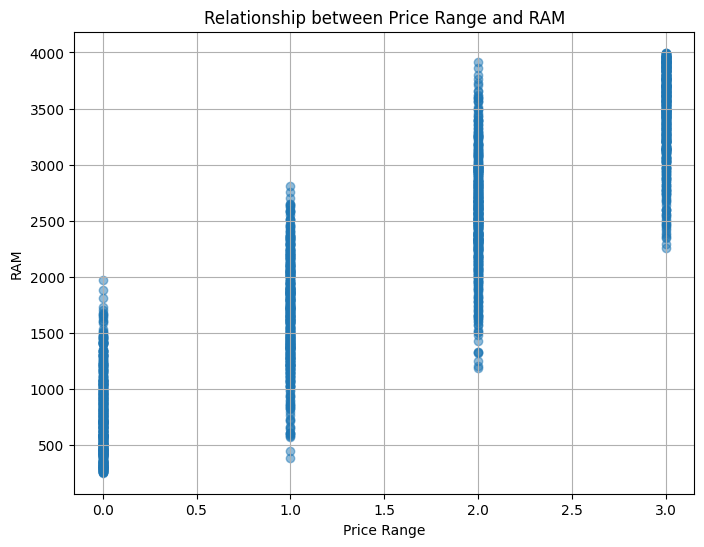

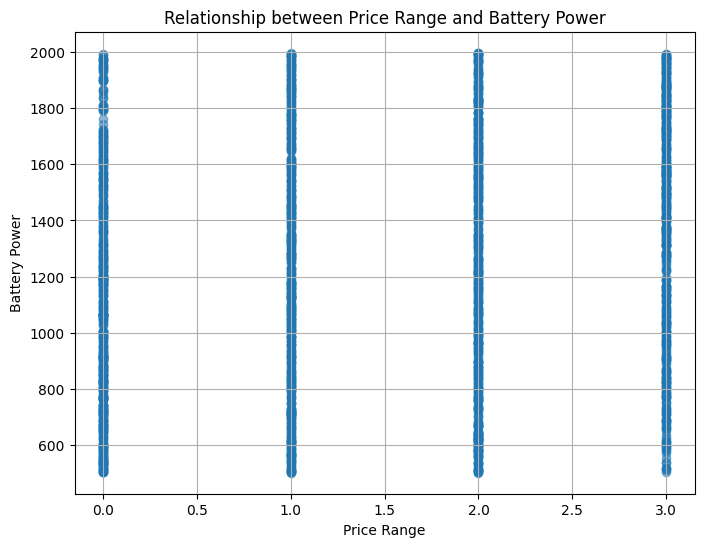

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(data['price_range'], data['ram'], alpha=0.5)
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('Relationship between Price Range and RAM')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(data['price_range'], data['battery_power'], alpha=0.5)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Relationship between Price Range and Battery Power')
plt.grid(True)
plt.show()


On this plots we can see representation of how Ram and Battery power effect price category


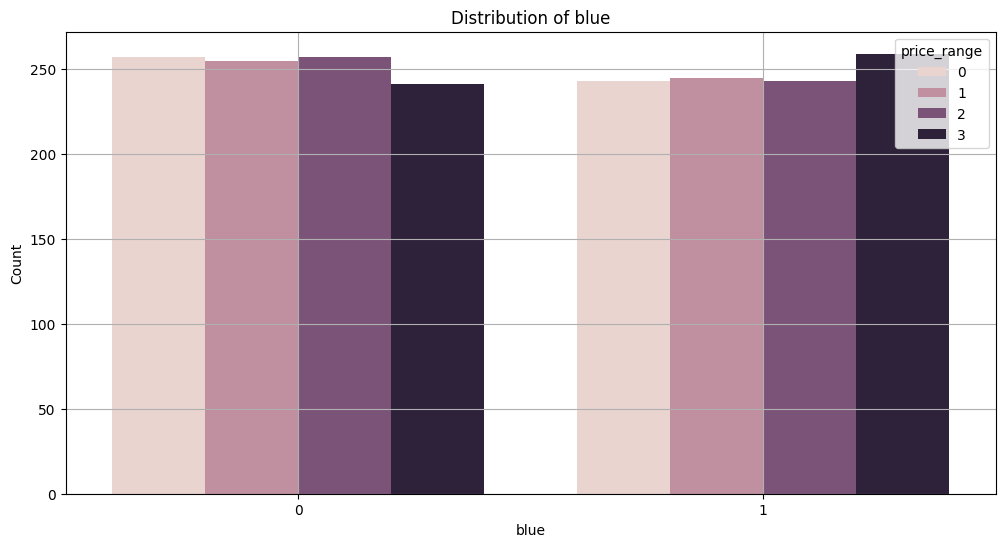

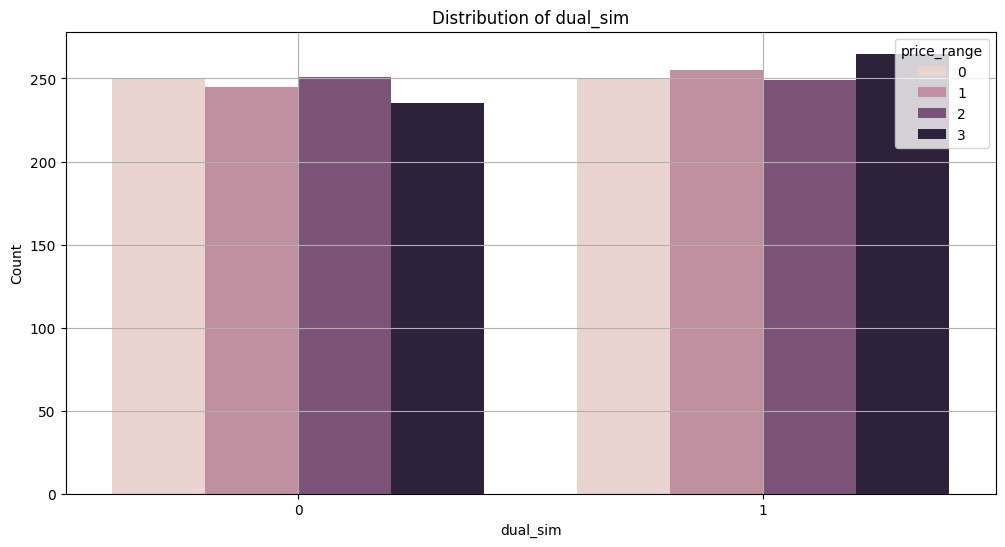

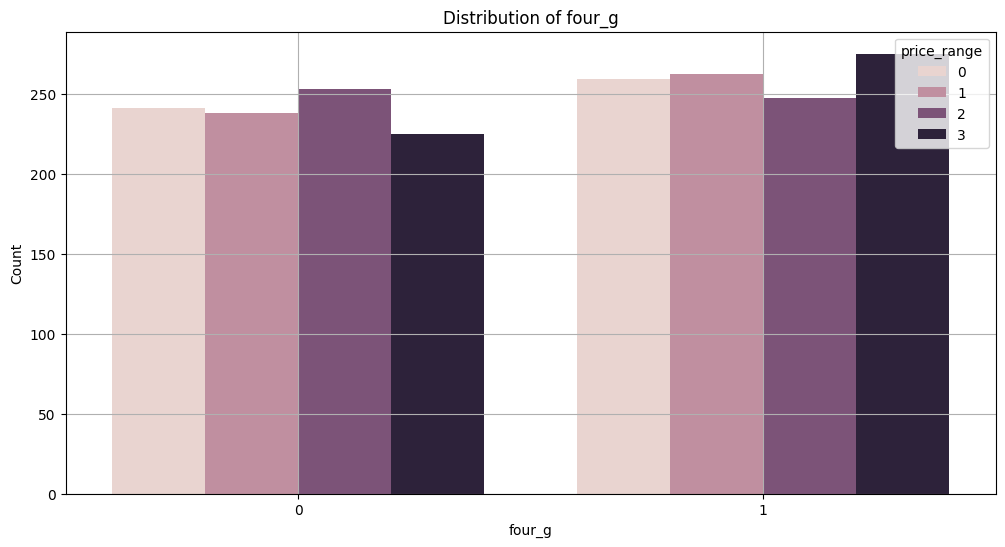

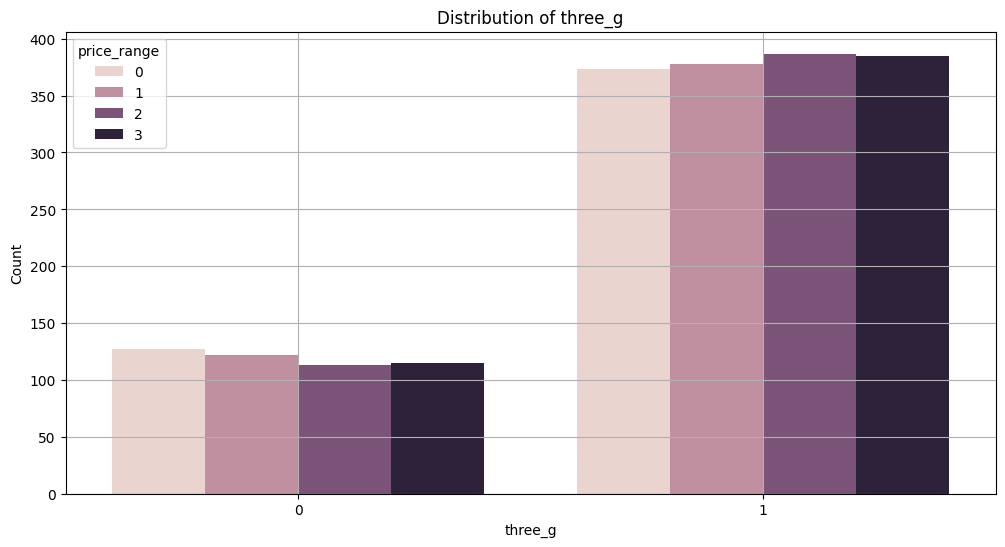

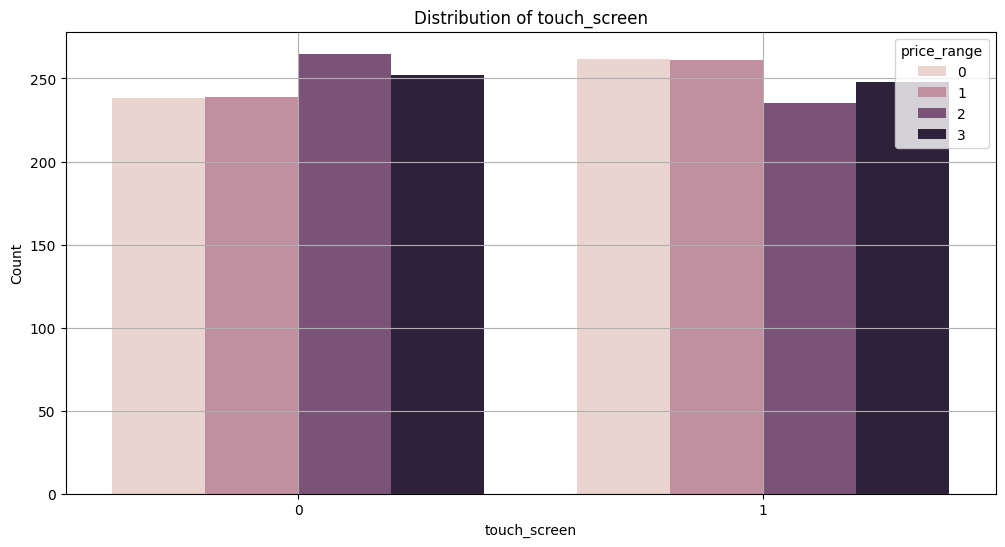

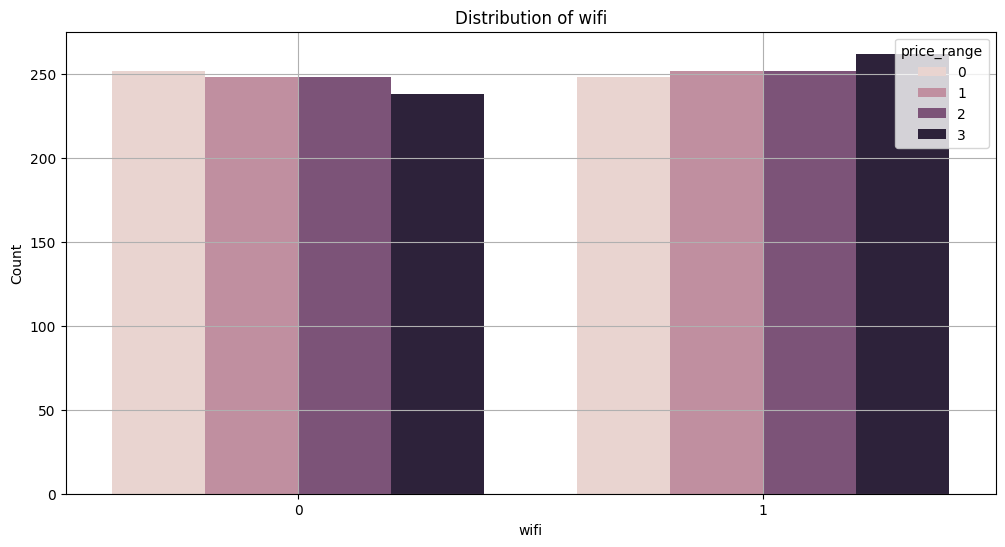

In [73]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
for i in categorical_col:
  plt.figure(figsize=(12, 6))
  sns.countplot(x=i, hue='price_range', data=data)
  sns.color_palette("dark")
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.title(f'Distribution of {i}')
  plt.grid(True)
  plt.show()

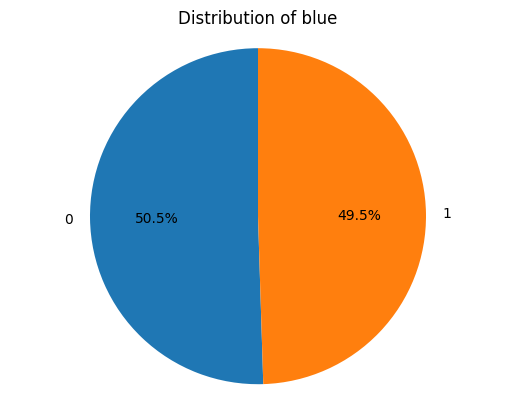

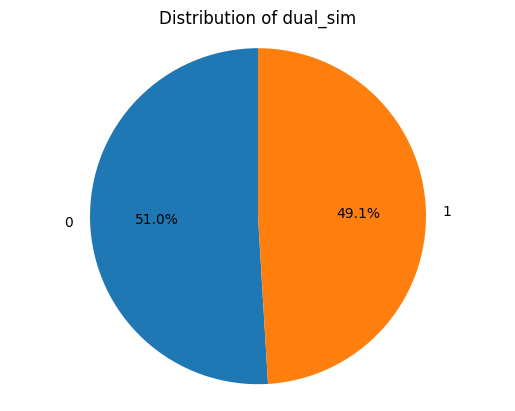

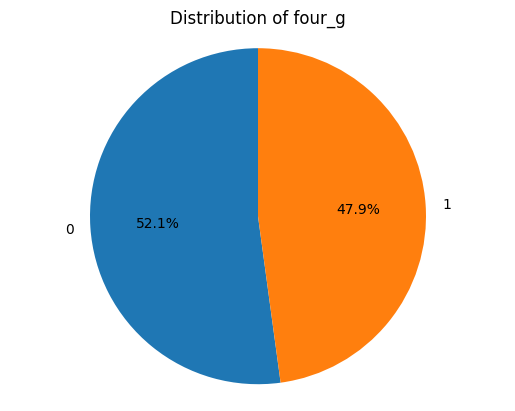

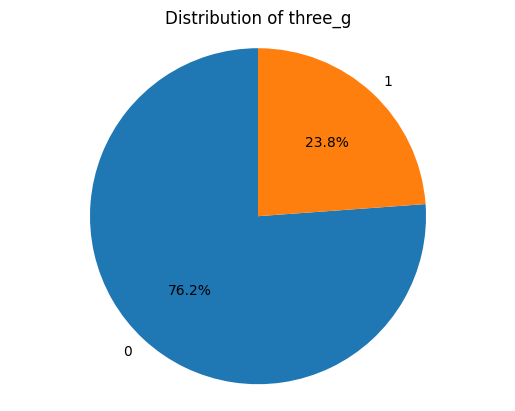

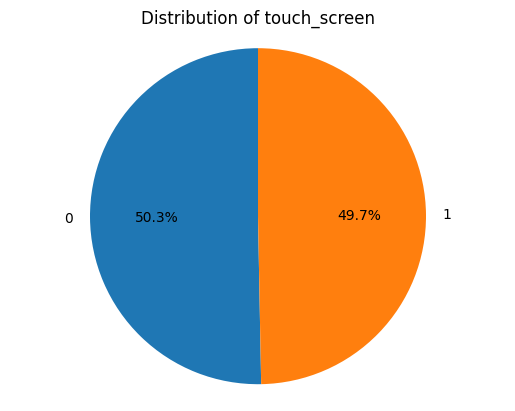

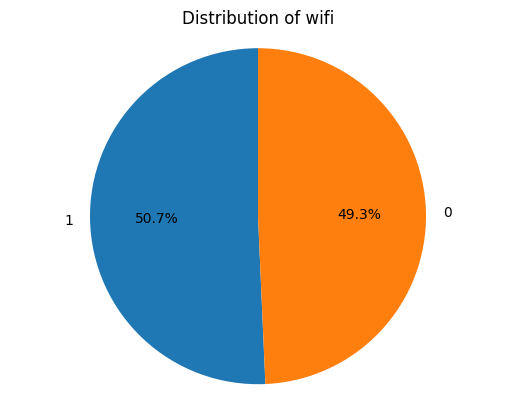

In [74]:
for i in categorical_col:
  fig1, ax1 = plt.subplots()
  ax1.pie(data[i].value_counts(), labels=data[i].unique(), autopct='%1.1f%%', startangle=90)
  ax1.axis('equal')
  plt.title(f'Distribution of {i}')
  plt.show()

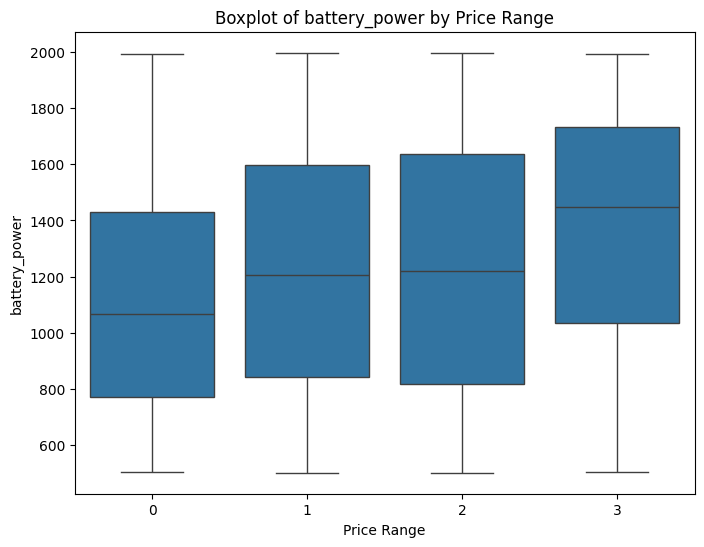

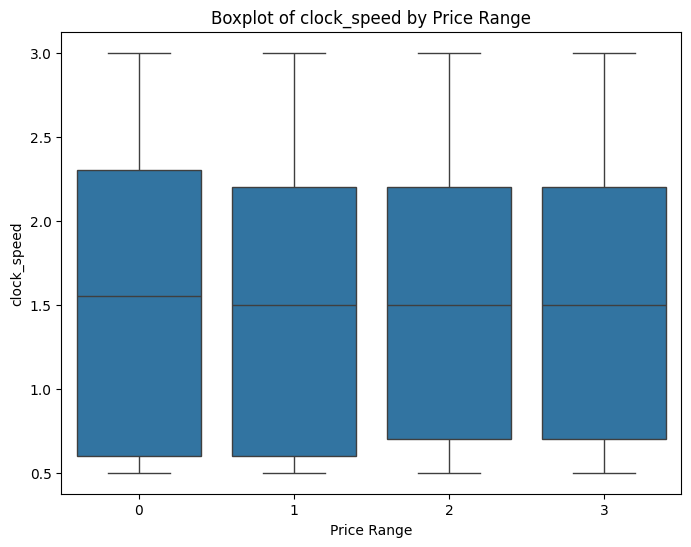

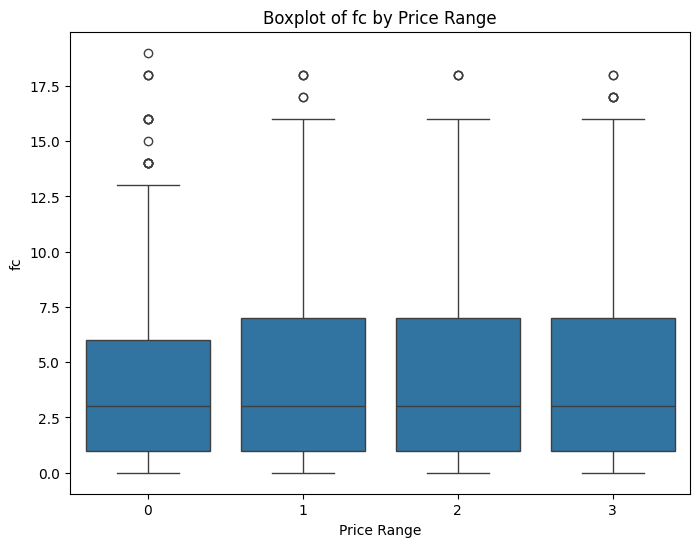

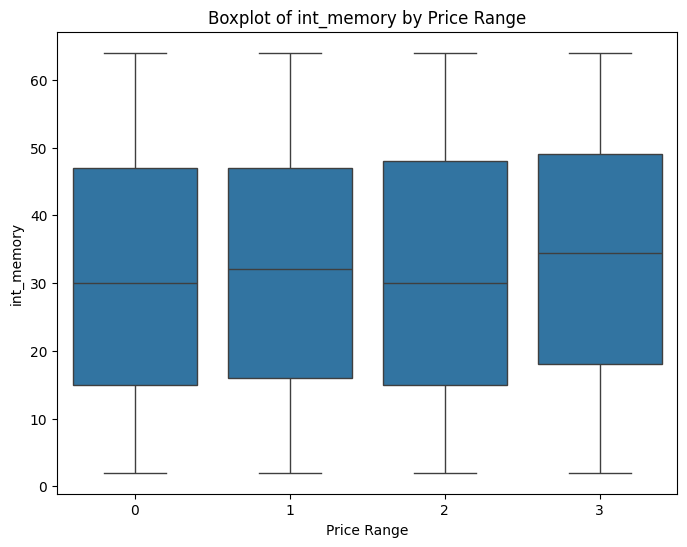

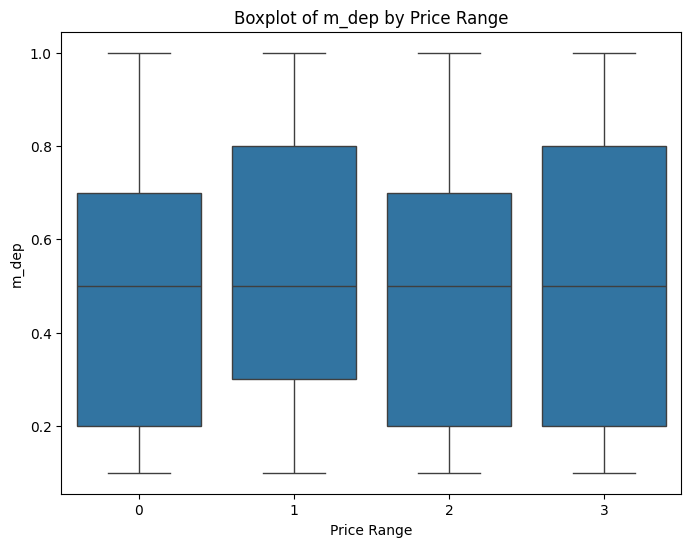

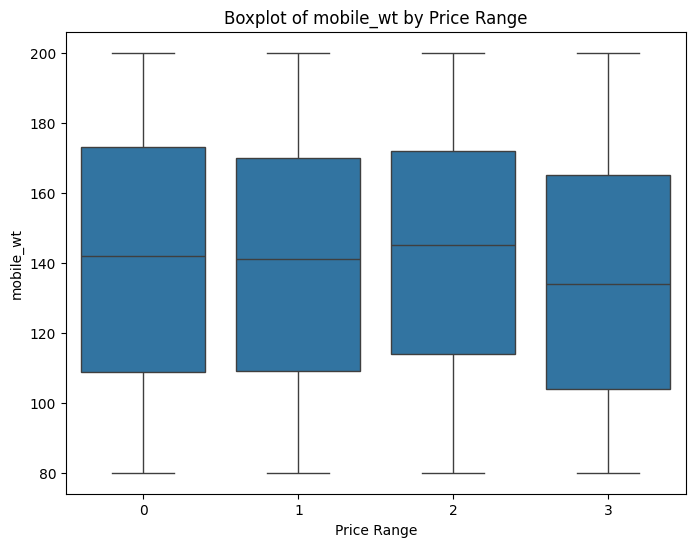

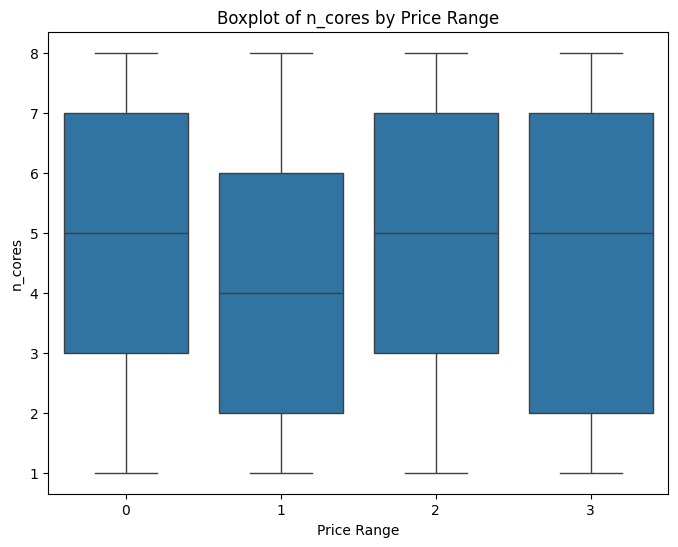

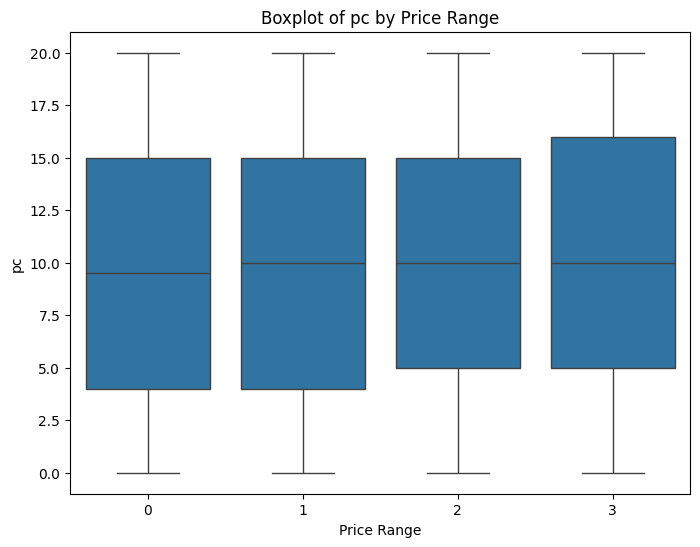

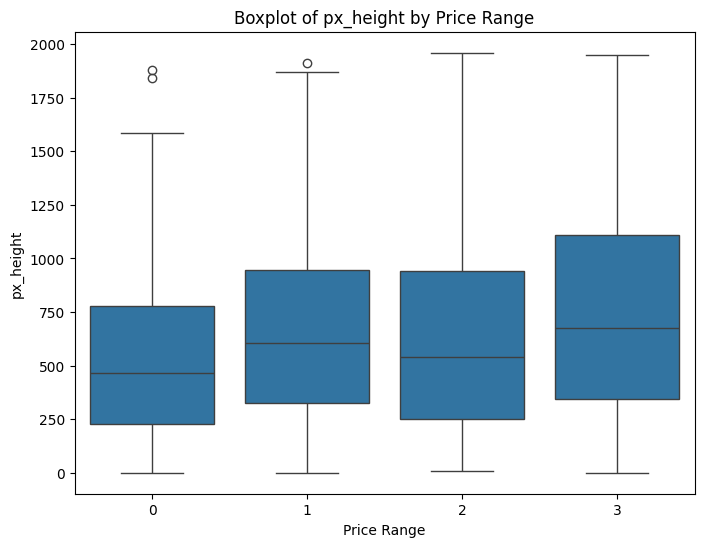

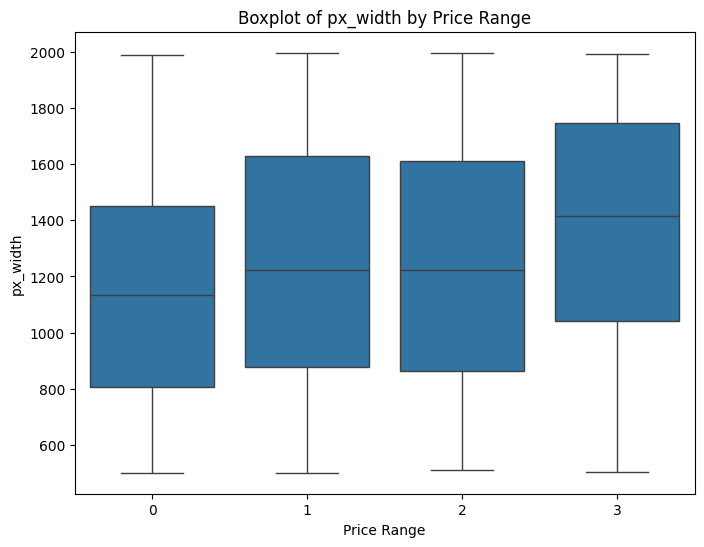

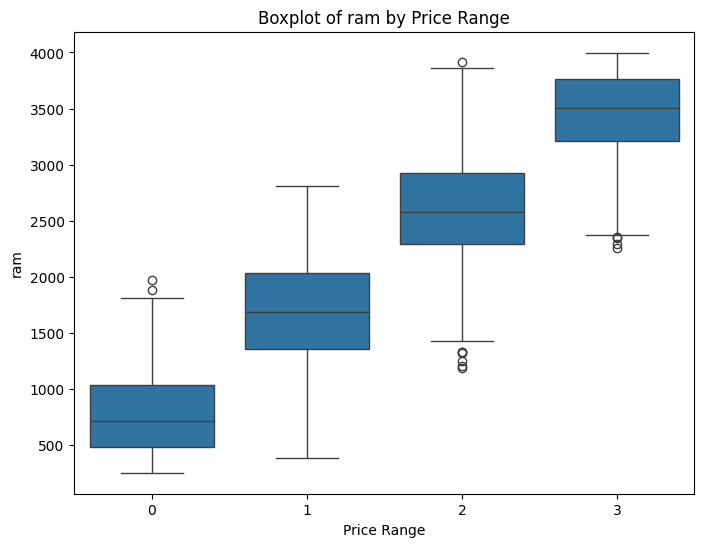

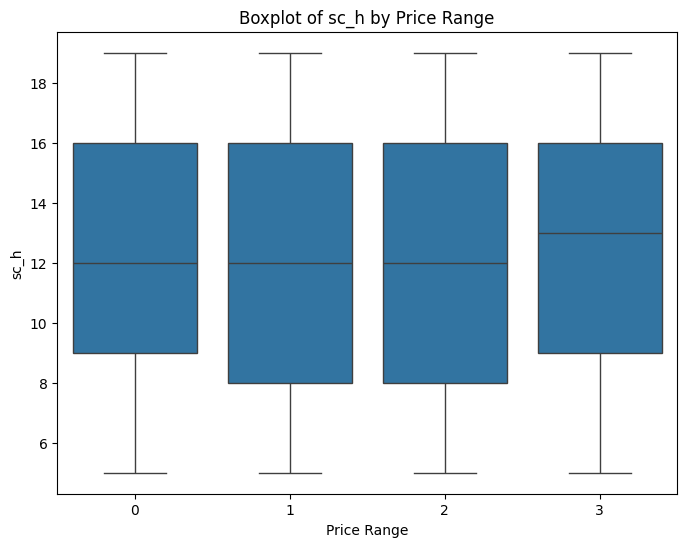

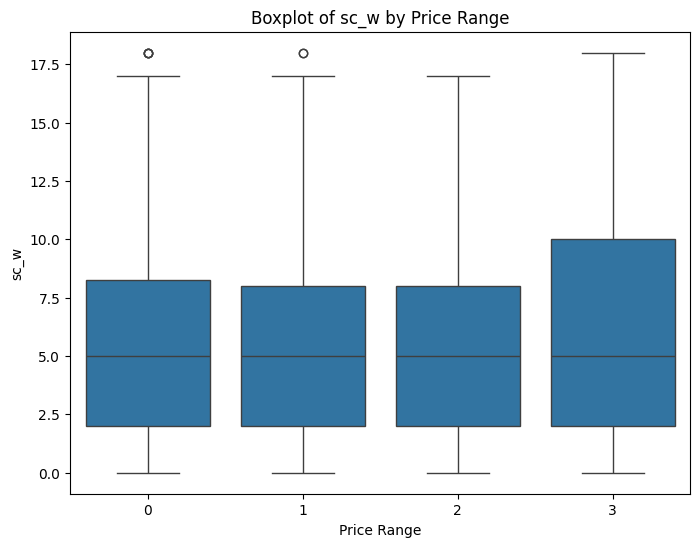

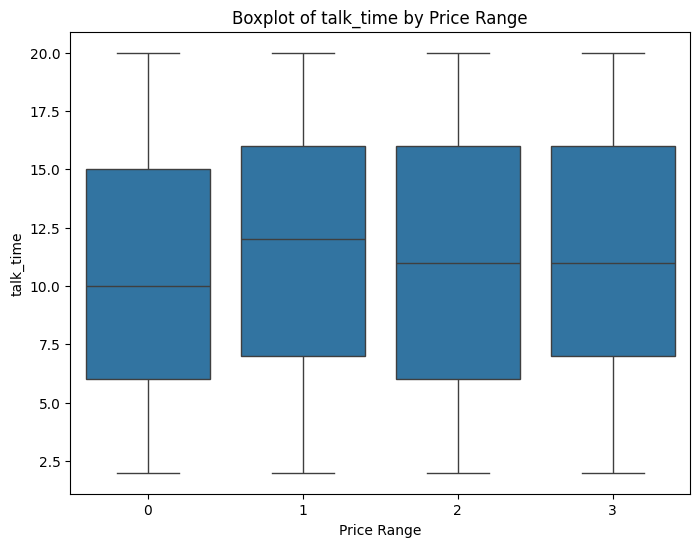

In [59]:
#Generating boxplots for non cathegorical columns
for column in data.columns:
  if column not in categorical_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='price_range', y=column, data=data)
    plt.xlabel('Price Range')
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} by Price Range')
    plt.show()


Heatmaps

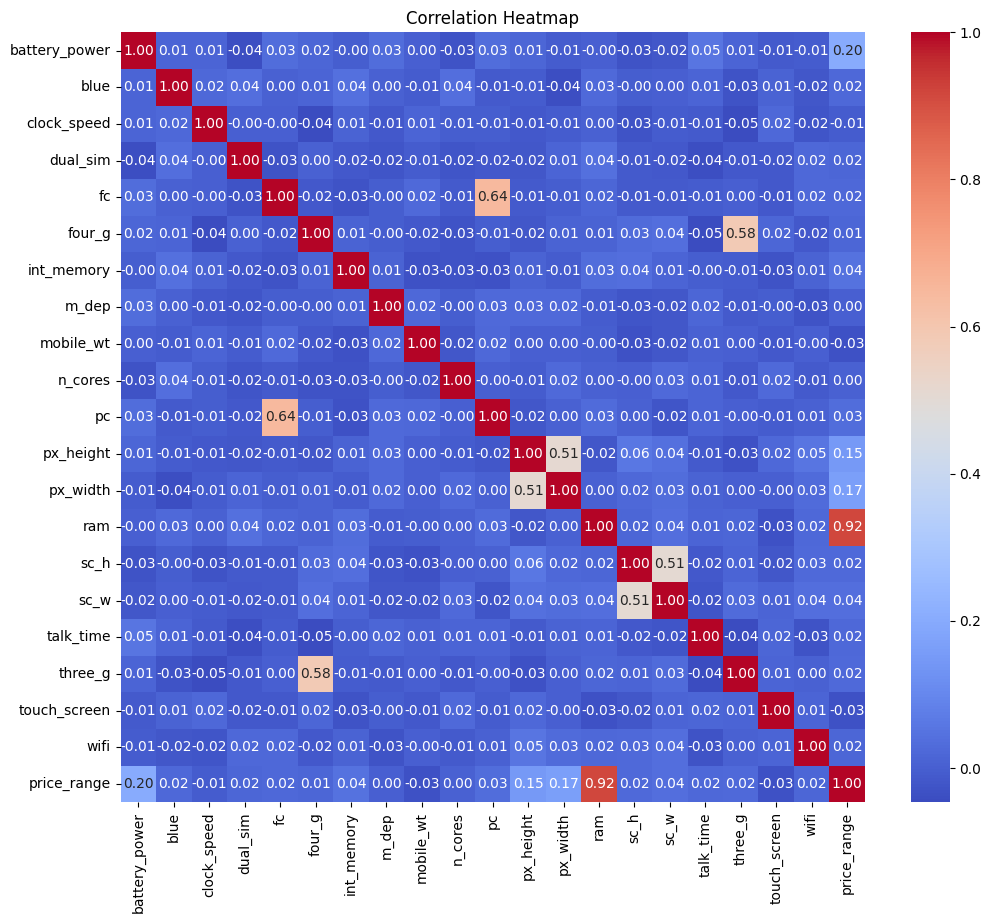

In [75]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Insight Synthesis And Conclusion:

I didn`t find that many interesting data in this set.
As a conclusion I would say that battery power and RAM are key differences for price categories. Data set was clean from beginning and we almost dont have outliers. Also I think dataset is not really relevant cause was posted 6-7 years ago.